In [1]:

#Взять boston house-prices datase (sklearn.datasets.load_boston). 
#Возмите 7 любых регрессоров (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [2]:
from sklearn.datasets import load_boston
import numpy as np


In [3]:
boston = load_boston()

In [4]:
for key in boston.keys():
    print( key )

data
target
feature_names
DESCR
filename


In [5]:
import pandas as pd
data = pd.read_csv(boston['filename'],skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
data['CRIM'] = np.log(data['CRIM'])
data['CRIM'] = data['LSTAT']<33
data['RM'] = (data['RM']-min(data['RM']))/(max(data['RM'])-min(data['RM']))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    bool   
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: bool(1), float64(10), int64(3)
memory usage: 52.0 KB


In [8]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'CRIM','RM','LSTAT','PTRATIO','MEDV' ] ]

In [9]:
import seaborn as sns
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

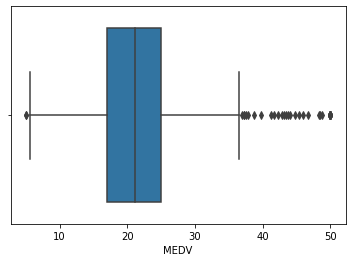

In [10]:
get_boxplot(data,columns=['MEDV'])

In [11]:
(data['MEDV']).value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: MEDV, Length: 229, dtype: int64

In [12]:
# create X (features) and y (response)
X = selectedColumns

# столбец MEDV является целевой переменной, удаляем его из X
del X['MEDV']
X.head()


,CRIM,RM,LSTAT,PTRATIO
0,True,0.577505,4.98,15.3
1,True,0.547998,9.14,17.8
2,True,0.694386,4.03,17.8
3,True,0.658555,2.94,18.7
4,True,0.687105,5.33,18.7


In [13]:
y = data.dropna()['MEDV']

In [14]:
#choose 7 of the following regressions:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [15]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, ARDRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import uniform   
from sklearn.model_selection import RandomizedSearchCV

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555 ) 

In [18]:
models=[
      {'name':'SGD',"model":SGDRegressor(), 'params':{ 'alpha': [0.00001,0.001,10, 100, 1000], 'penalty':['l1', 'l2','elasticnet'],  'learning_rate':['constant', 'optimal','adaptive','invscaling'] }},  
      {'name':'ARD',"model": ARDRegression(), 'params':{'n_iter':[10,50,100,200], 'tol': uniform(loc=0, scale=3), 'lambda_1': uniform(loc=0, scale=3), 'lambda_2': uniform(loc=0, scale=3)}},
      {'name':'R',"model": Ridge(), 'params':{'alpha': uniform(loc=0, scale=4), 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}},
      {'name':'Lasso',"model": Lasso(), 'params':{'alpha': uniform(loc=0, scale=4), 'max_iter':[10,100,1000] }},
      {'name':'RFR',"model": RandomForestRegressor(), 'params':{'n_estimators':[10,25,50,100,150,200], 'max_depth':[3,5,7,9,11]}},
      {'name':'KNR',"model": KNeighborsRegressor(), 'params':{'n_neighbors':list(range(1,30)),'weights': ['uniform', 'distance'], 'p':[1,2,3]}},
      {'name':'DTR',"model": DecisionTreeRegressor(), 'params':{'criterion':['mse', 'friedman_mse', 'mae', 'poisson'], 'max_depth':[3,5,7,9,11], 'splitter': ['best', 'random']}}
]

In [19]:
pred_res=[]
for v in models:
    pred_res.append((v['name'], RandomizedSearchCV(v['model'], v['params'], cv=10, refit=True).fit(X_train, y_train)))


In [20]:
for r in pred_res:
    print(r[0], r[1].best_score_, r[1].best_params_)

SGD 0.3470589654872375 {'penalty': 'l2', 'learning_rate': 'adaptive', 'alpha': 100}
ARD 0.687429359997082 {'lambda_1': 0.36549659333859974, 'lambda_2': 2.119179929222915, 'n_iter': 50, 'tol': 2.4819717949172633}
R 0.6806384039319012 {'alpha': 1.175210174665347, 'solver': 'lsqr'}
Lasso 0.587533791779108 {'alpha': 0.5602265032860414, 'max_iter': 10}
RFR 0.7905219327461765 {'n_estimators': 150, 'max_depth': 7}
KNR 0.7345754932888089 {'weights': 'distance', 'p': 1, 'n_neighbors': 16}
DTR 0.7583272590093016 {'splitter': 'best', 'max_depth': 5, 'criterion': 'mae'}


In [21]:
y_pred = pred_res[4][1].best_estimator_.predict(X_test)
wrong = y_pred != y_test

X_wrong, y_wrong, y_true_wrong = X_test[wrong], y_pred[wrong], y_test[wrong]

In [22]:
y_true_wrong.value_counts()

50.0    3
22.9    2
22.8    2
18.5    2
30.1    2
       ..
20.8    1
25.2    1
33.2    1
18.2    1
20.3    1
Name: MEDV, Length: 85, dtype: int64